In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

from pyspark.ml import Pipeline
from pyspark.ml.feature import (
    VectorAssembler,
    StringIndexer,
    VectorIndexer,
    StandardScaler
)
from pyspark.ml.classification import (
    LogisticRegression,
    LinearSVC,
    RandomForestClassifier,
    GBTClassifier
)
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [2]:
spark = (
    SparkSession
    .builder
    .master('local[*]')
    .getOrCreate()
)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/06/05 07:28:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Problem 1

## Problem 1a [2 pts]

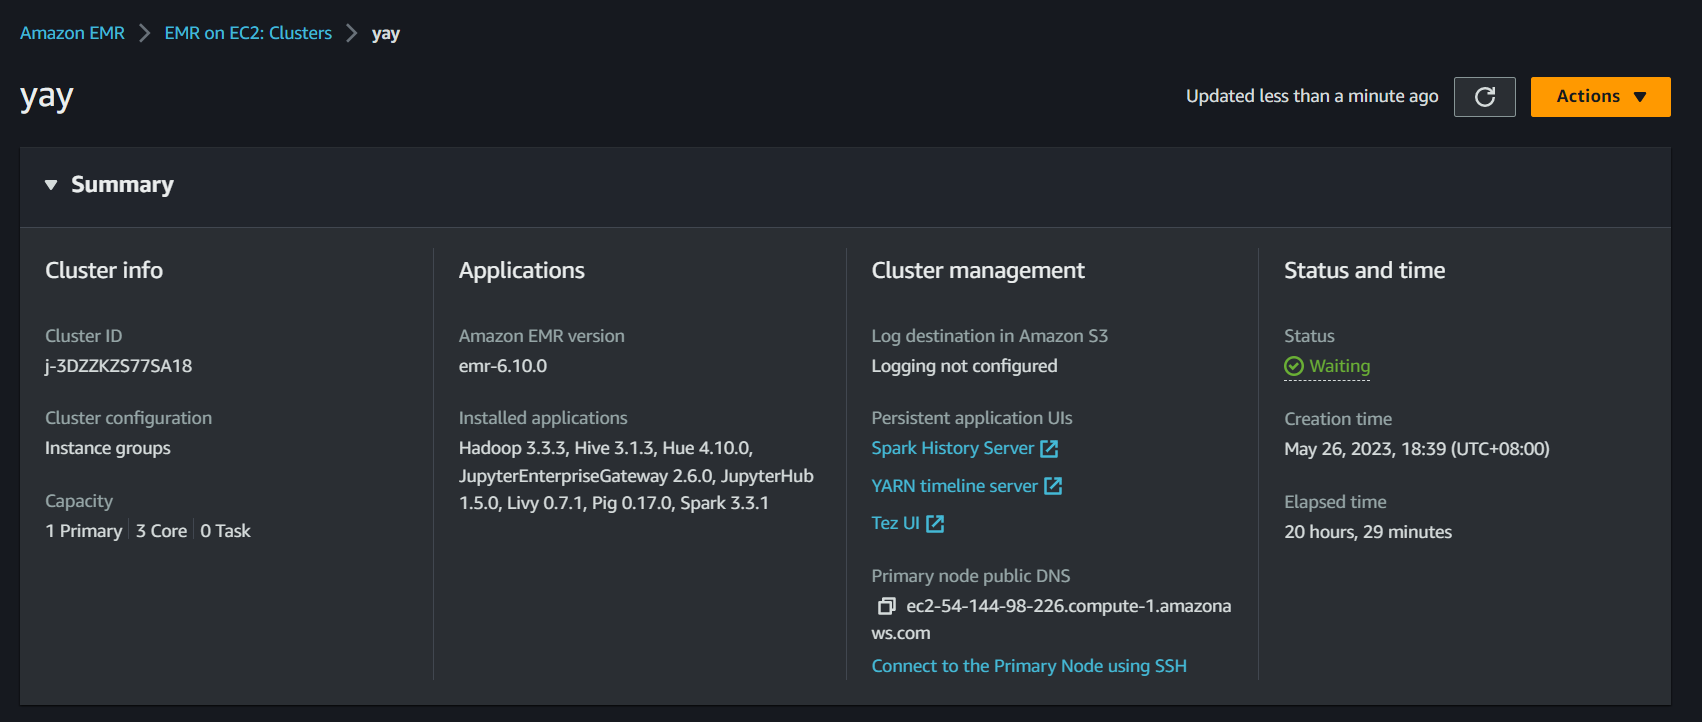

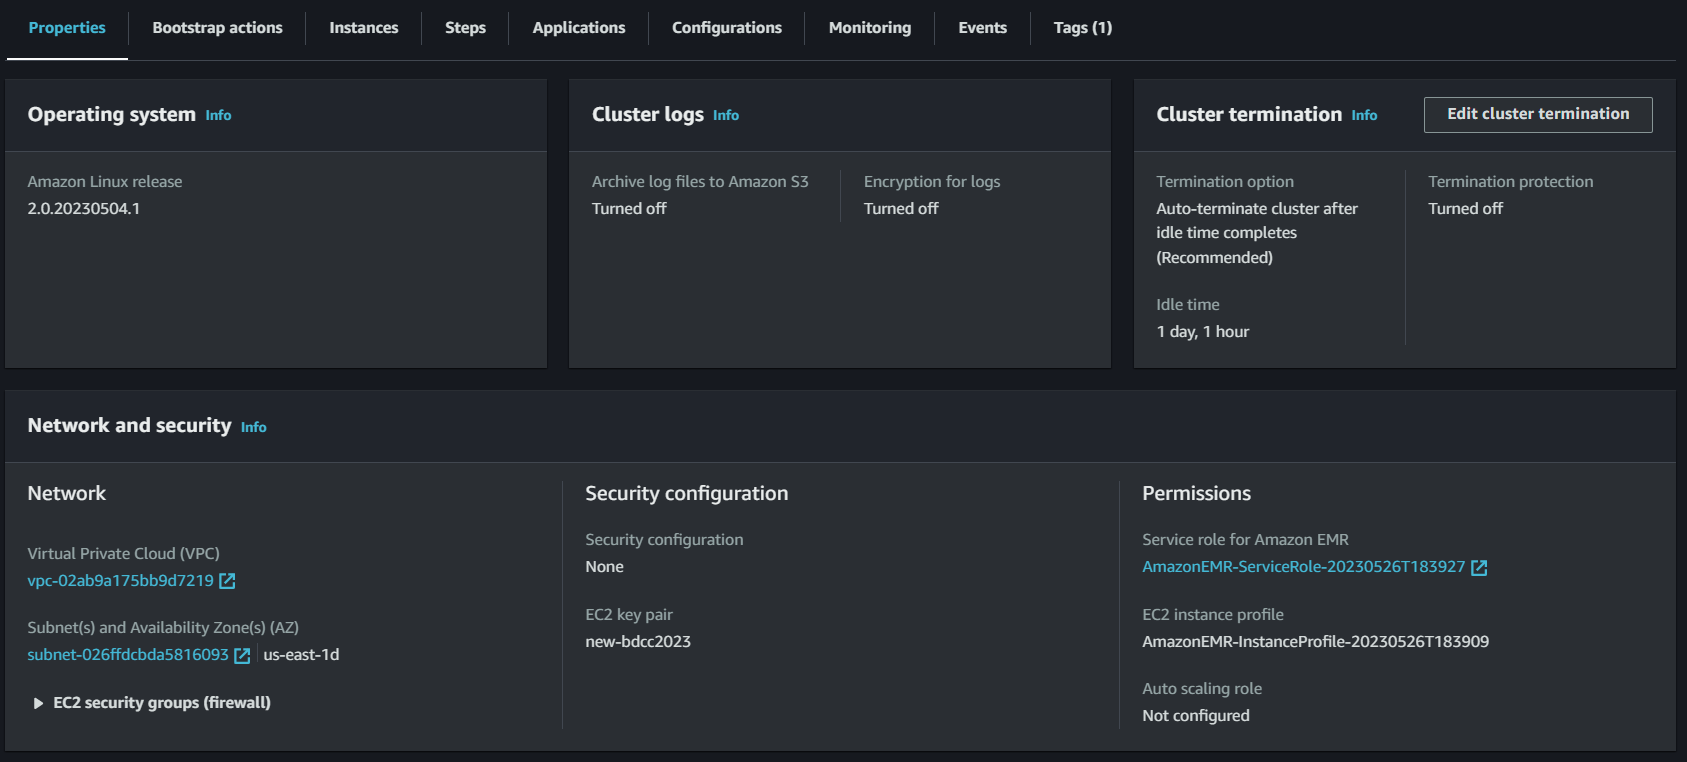

## Problem 1b [2 pts]

In [14]:
import pyspark.sql.functions as F
from pyspark.sql.types import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
df = spark.read.text('s3://commoncrawl/crawl-002/2010/09/25/9')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
df_filtered = (
    df
    .filter(F.col('value').like('x_commoncrawl_FetchTimestamp:%'))
    .cache()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
df_crawl = (
    df_filtered
    .select(
        F.regexp_extract('value', r'\d+', 0).alias('ms').cast(LongType())
    )
    .withColumn(
        'hour', F.hour(F.from_unixtime(F.col('ms') / 1000).cast('timestamp'))
    )
    .groupby('hour')
    .count()
    .orderBy('hour')
    .cache()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
df_crawl.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    hour   count
0      0  279690
1      1  284567
2      2  243799
3      3  218168
4      4  195931
5      5  187242
6      6  187342
7      7  187737
8      8  183221
9      9  227634
10    10  238429
11    11  244992
12    12  236867
13    13  210717
14    14  192280
15    15  161241
16    16  166373
17    17  171796
18    18  166808
19    19  172275
20    20  225362
21    21  191506
22    22  143463
23    23  246847

In [ ]:
import pyspark.sql.functions as F
from pyspark.sql.types import *

df = spark.read.text('s3://commoncrawl/crawl-002/2010/09/25/9')

df_filtered = (
    df
    .filter(F.col('value').like('x_commoncrawl_FetchTimestamp:%'))
    .cache()
)

df_crawl = (
    df_filtered
    .select(
        F.regexp_extract('value', r'\d+', 0).alias('ms').cast(LongType())
    )
    .withColumn(
        'hour', F.hour(F.from_unixtime(F.col('ms') / 1000).cast('timestamp'))
    )
    .groupby('hour')
    .count()
    .orderBy('hour')
    .cache()
)

df_crawl.toPandas()

## Problem 1c [2 pts]

Create a bar plot of the number of crawled URLs vs hour of day, i.e., plot the DataFrame of your result above, using matplotlib. Make sure the axes are properly labeled.


In [20]:
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
pdf_crawl = df_crawl.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

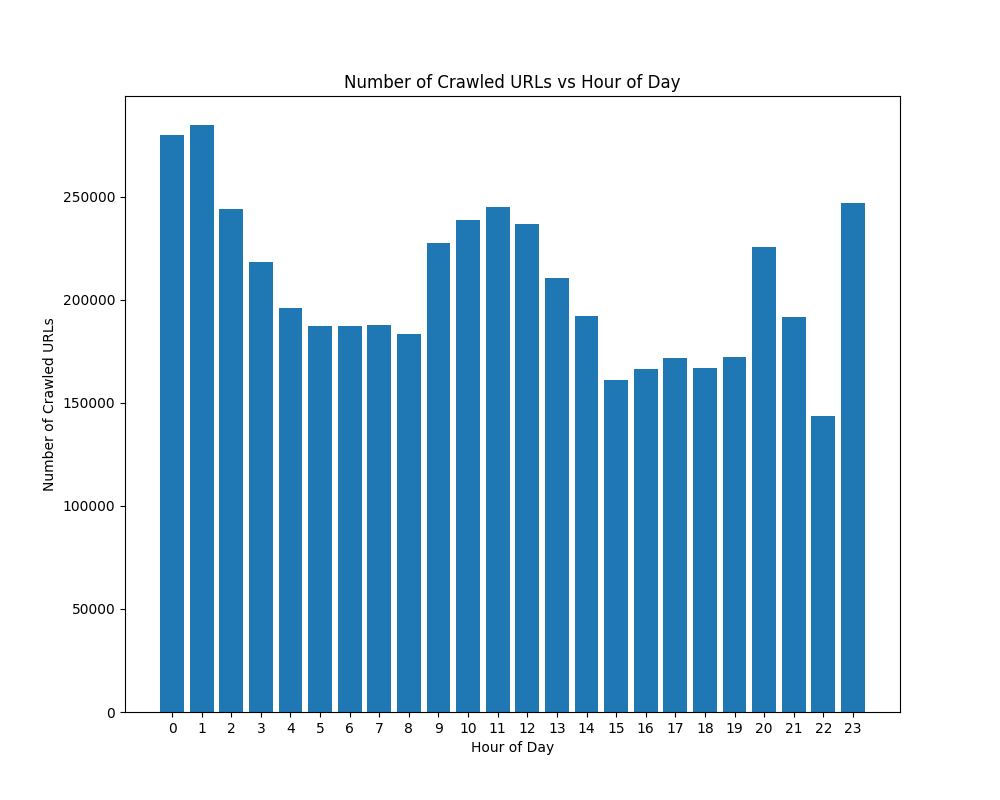

In [22]:
plt.figure(figsize=(10, 8))

plt.bar(pdf_crawl['hour'], pdf_crawl['count'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crawled URLs')
plt.title('Number of Crawled URLs vs Hour of Day')
plt.xticks(pdf_crawl['hour'])

%matplot plt

# Problem 2

## Problem 2a [2 pts]

In [3]:
def compute_pcc():
    """
    Return the PCC for Label excluding Label values with value Label from the
    dataset.
    """
    global spark
    path = ('/mnt/localdata/public/cyberdefense/'
            'Processed Traffic Data for ML Algorithms/Wednesday-*.csv')

    df = spark.read.csv(path, header=True)

    return (
        df
        .filter(F.col('label') != 'Label')
        .groupby('Label')
        .count()
        .withColumn('pcc', (F.col('count') / df.count()) ** 2)
        .agg(F.sum('pcc')).first()[0]
    )

In [4]:
from numpy.testing import assert_almost_equal
pcc = compute_pcc()

## Problem 2b

In [5]:
path = ('/mnt/localdata/public/cyberdefense/'
        'Processed Traffic Data for ML Algorithms/Wednesday-*.csv')
df = spark.read.csv(path, header=True).filter(F.col('label') != 'Label')

### Check available columns

In [6]:
df.columns

['Dst Port',
 'Protocol',
 'Timestamp',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd B

We use the `mean` and `std` related columns.

In [7]:
features = [col for col in df.columns if
            ('mean' in col.lower()) or ('std' in col.lower())]

In [8]:
df = df.select([F.col(feat).astype('double') for feat in features] +
               ['Label'])

### Machine learning pipeline

In [9]:
pipe = Pipeline(stages=[
    VectorAssembler(inputCols=features, outputCol='features'),
    StringIndexer(inputCol='Label', outputCol='label'),
    StandardScaler(inputCol='features', outputCol='features_scaled'),
    RandomForestClassifier(
        maxDepth=5,
        seed=143,
        featuresCol='features_scaled',
        labelCol='label',
        predictionCol='prediction'
    )
])

1. Split the the data to train-validation and test set.
1. Build the parameter grid and instantiate a multi-class evaluator.
1. Perform hyperparameter tuning and cross validation.

In [10]:
df_train, df_test = df.randomSplit([0.7, 0.3], seed=143)
df_train.cache()
df_test.cache()

param_grid = (
    ParamGridBuilder()
    .addGrid(pipe.getStages()[-1].maxDepth, [4, 8, 12])
    .build()
)

evaluator = MulticlassClassificationEvaluator(
    labelCol='label', predictionCol='prediction', metricName='accuracy'
)

cv = CrossValidator(estimator=pipe,
                    estimatorParamMaps=param_grid,
                    evaluator=evaluator)

Fit the training data to the cross-validator.

In [11]:
cv_trained = cv.fit(df_train)

23/06/05 07:29:15 WARN MemoryStore: Not enough space to cache rdd_41_3 in memory! (computed 20.8 MiB so far)
23/06/05 07:29:15 WARN BlockManager: Persisting block rdd_41_3 to disk instead.


23/06/05 07:29:25 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


23/06/05 07:30:46 WARN DAGScheduler: Broadcasting large task binary with size 1278.1 KiB


23/06/05 07:30:49 WARN DAGScheduler: Broadcasting large task binary with size 1928.2 KiB


23/06/05 07:30:52 WARN DAGScheduler: Broadcasting large task binary with size 2.8 MiB


23/06/05 07:30:55 WARN DAGScheduler: Broadcasting large task binary with size 3.9 MiB


23/06/05 07:30:59 WARN DAGScheduler: Broadcasting large task binary with size 1275.8 KiB


23/06/05 07:32:15 WARN DAGScheduler: Broadcasting large task binary with size 1256.0 KiB


23/06/05 07:32:18 WARN DAGScheduler: Broadcasting large task binary with size 1893.0 KiB


23/06/05 07:32:22 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB


23/06/05 07:32:25 WARN DAGScheduler: Broadcasting large task binary with size 3.9 MiB


23/06/05 07:32:29 WARN DAGScheduler: Broadcasting large task binary with size 1323.1 KiB


23/06/05 07:33:47 WARN DAGScheduler: Broadcasting large task binary with size 1288.0 KiB


23/06/05 07:33:49 WARN DAGScheduler: Broadcasting large task binary with size 1949.0 KiB


23/06/05 07:33:53 WARN DAGScheduler: Broadcasting large task binary with size 2.8 MiB


23/06/05 07:33:56 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


23/06/05 07:34:01 WARN DAGScheduler: Broadcasting large task binary with size 1289.7 KiB


23/06/05 07:34:15 WARN MemoryStore: Not enough space to cache rdd_885_3 in memory! (computed 68.0 MiB so far)
23/06/05 07:34:15 WARN BlockManager: Persisting block rdd_885_3 to disk instead.
23/06/05 07:34:15 WARN MemoryStore: Not enough space to cache rdd_885_2 in memory! (computed 68.0 MiB so far)
23/06/05 07:34:15 WARN BlockManager: Persisting block rdd_885_2 to disk instead.


23/06/05 07:34:22 WARN MemoryStore: Not enough space to cache rdd_885_1 in memory! (computed 43.6 MiB so far)
23/06/05 07:34:22 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 68.0 MiB so far)


23/06/05 07:34:25 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 43.6 MiB so far)


23/06/05 07:34:28 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 43.6 MiB so far)


23/06/05 07:34:31 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 43.6 MiB so far)


23/06/05 07:34:34 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 43.6 MiB so far)


23/06/05 07:34:37 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 43.6 MiB so far)


23/06/05 07:34:41 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 43.6 MiB so far)


23/06/05 07:34:44 WARN DAGScheduler: Broadcasting large task binary with size 1304.0 KiB


23/06/05 07:34:45 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 43.6 MiB so far)


23/06/05 07:34:48 WARN DAGScheduler: Broadcasting large task binary with size 2001.6 KiB


23/06/05 07:34:49 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 43.6 MiB so far)


23/06/05 07:34:53 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB


23/06/05 07:34:53 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 43.6 MiB so far)


23/06/05 07:34:58 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB


23/06/05 07:34:59 WARN MemoryStore: Not enough space to cache rdd_885_0 in memory! (computed 43.6 MiB so far)
23/06/05 07:34:59 WARN MemoryStore: Not enough space to cache rdd_885_2 in memory! (computed 68.0 MiB so far)


Get the test accuracy of the best model.

In [12]:
test_accuracy = (
    evaluator
    .setMetricName('accuracy')
    .evaluate(cv_trained.transform(df_test))
)

23/06/05 07:35:04 WARN DAGScheduler: Broadcasting large task binary with size 1267.5 KiB


In [13]:
print(f'Test Accuracy = {test_accuracy*100:.2f}%')

Test Accuracy = 94.60%


In [17]:
import re

for key, val in cv_trained.bestModel.stages[-1].extractParamMap().items():
    match = re.match(r'(.*_).*', key.parent)
    print(f'{match.group(1)}{key.name} = {val}')

RandomForestClassifier_bootstrap = True
RandomForestClassifier_cacheNodeIds = False
RandomForestClassifier_checkpointInterval = 10
RandomForestClassifier_featureSubsetStrategy = auto
RandomForestClassifier_featuresCol = features_scaled
RandomForestClassifier_impurity = gini
RandomForestClassifier_labelCol = label
RandomForestClassifier_leafCol = 
RandomForestClassifier_maxBins = 32
RandomForestClassifier_maxDepth = 12
RandomForestClassifier_maxMemoryInMB = 256
RandomForestClassifier_minInfoGain = 0.0
RandomForestClassifier_minInstancesPerNode = 1
RandomForestClassifier_minWeightFractionPerNode = 0.0
RandomForestClassifier_numTrees = 20
RandomForestClassifier_predictionCol = prediction
RandomForestClassifier_probabilityCol = probability
RandomForestClassifier_rawPredictionCol = rawPrediction
RandomForestClassifier_seed = 143
RandomForestClassifier_subsamplingRate = 1.0
